In [114]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [110]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [94]:
# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('Yash.csv')

In [95]:
df.head()

,Price,Reg,Mil,Gear Transmission,Fuel Type
0,21000,2019,92760,Automatic,Petrol
1,18040,2020,25847,Manual,Petrol
2,35000,2021,33970,Automatic,Petrol
3,19000,2019,15603,Manual,Petrol
4,17998,2019,29980,Manual,Petrol


In [62]:

print(df.columns)

Index(['Price', 'Reg', 'Model', ' Mil', 'Gear Transmission', 'Fuel Type'], dtype='object')


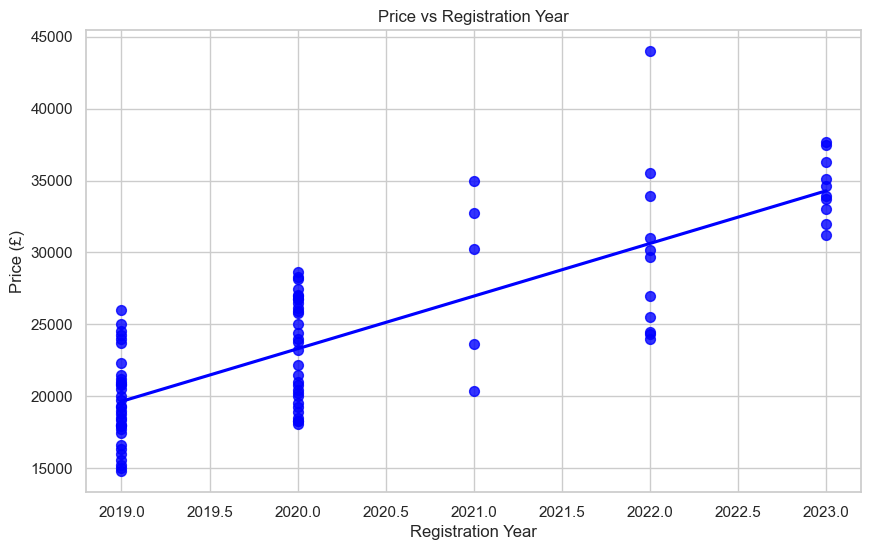

In [51]:
# Convert 'Reg' column to numeric
df['Reg'] = pd.to_numeric(df['Reg'], errors='coerce')

# Scatter plot of price vs registration year with regression line and different colors
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.regplot(x='Reg', y='Price', data=df, scatter_kws={'s': 50}, color='blue', ci=None)
plt.title('Price vs Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Price (£)')
plt.show()

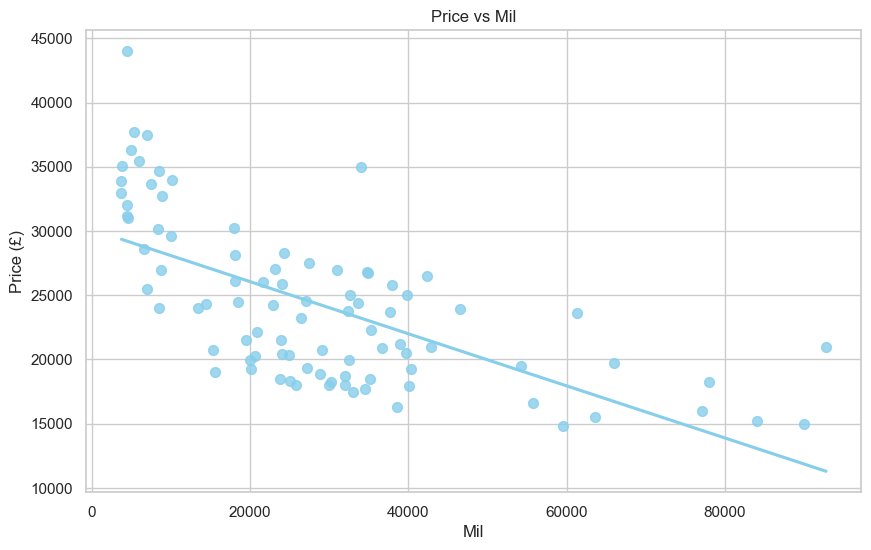

In [72]:
# Convert 'Mileage' to numeric
df['Mil'] = pd.to_numeric(df[' Mil'], errors='coerce')

# Scatter plot of Price vs Mileage
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.regplot(x='Mil', y='Price', data=df, scatter_kws={'s': 50}, color='skyblue', ci=None)
plt.title('Price vs Mil')
plt.xlabel('Mil')
plt.ylabel('Price (£)')
plt.show()

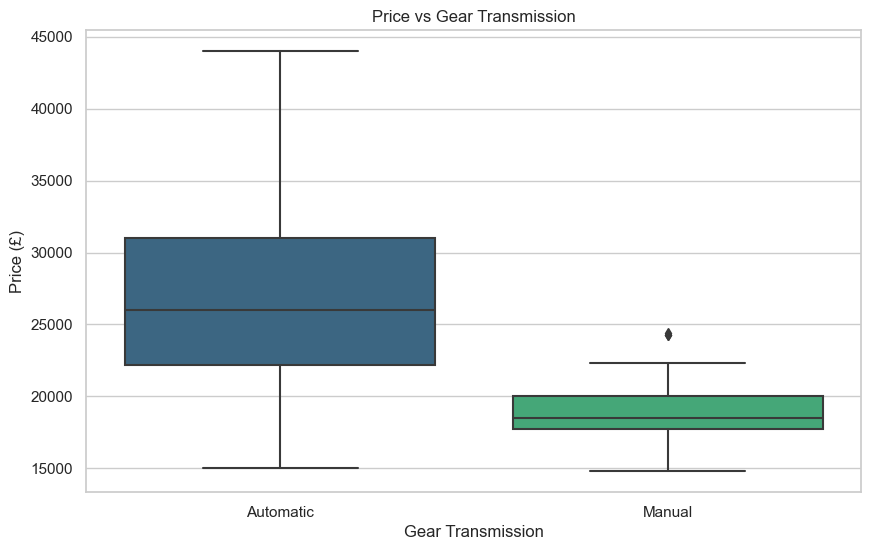

In [73]:
# Box plot of Price vs Gear Transmission
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(x='Gear Transmission', y='Price', data=df, palette='viridis')
plt.title('Price vs Gear Transmission')
plt.xlabel('Gear Transmission')
plt.ylabel('Price (£)')
plt.show()


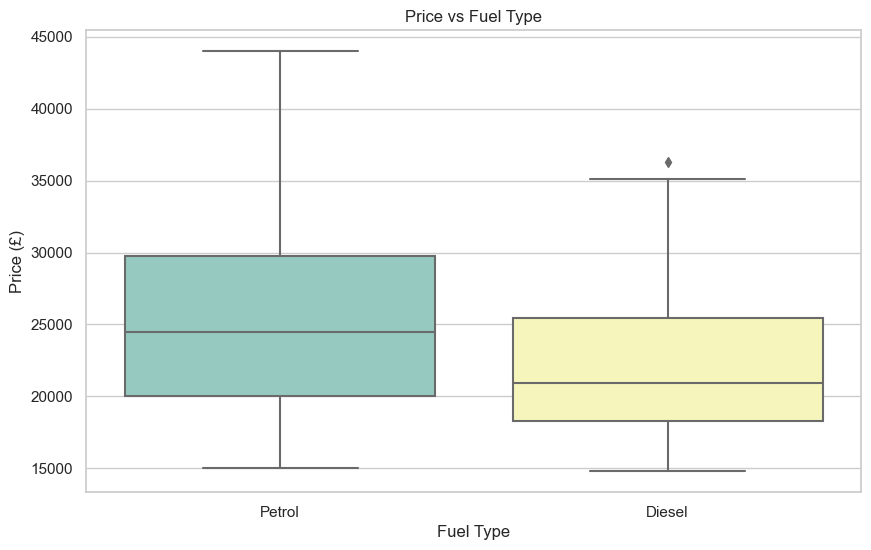

In [75]:
# Box plot of Price vs Fuel Type
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(x='Fuel Type', y='Price', data=df, palette='Set3')
plt.title('Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (£)')
plt.show()

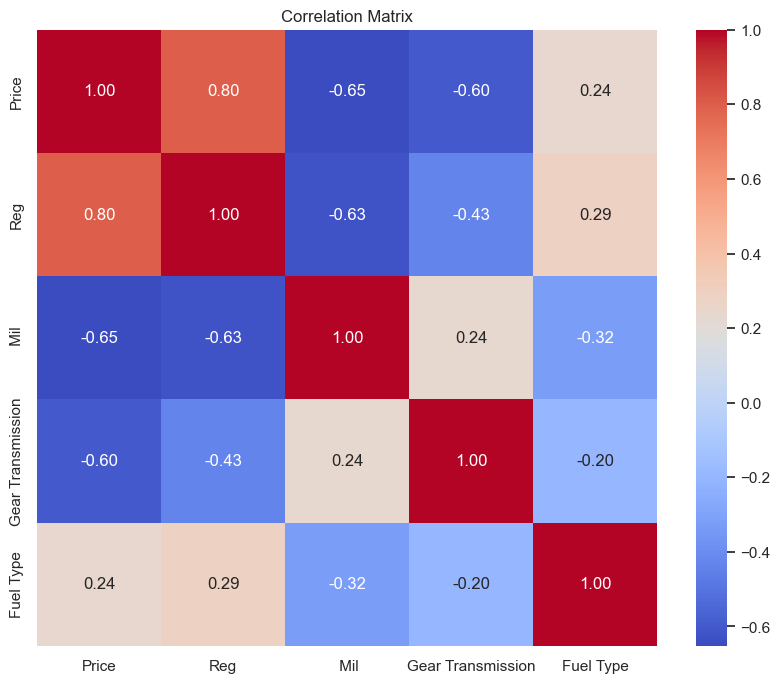

In [96]:
# Make a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Use LabelEncoder for 'Gear Transmission' and 'Fuel Type'
label_encoder = LabelEncoder()
df_encoded['Gear Transmission'] = label_encoder.fit_transform(df_encoded['Gear Transmission'])
df_encoded['Fuel Type'] = label_encoder.fit_transform(df_encoded['Fuel Type'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Mean Absolute Error: 5374.217555076171
Mean Squared Error: 28882214.3292889
Root Mean Squared Error: 5374.217555076171


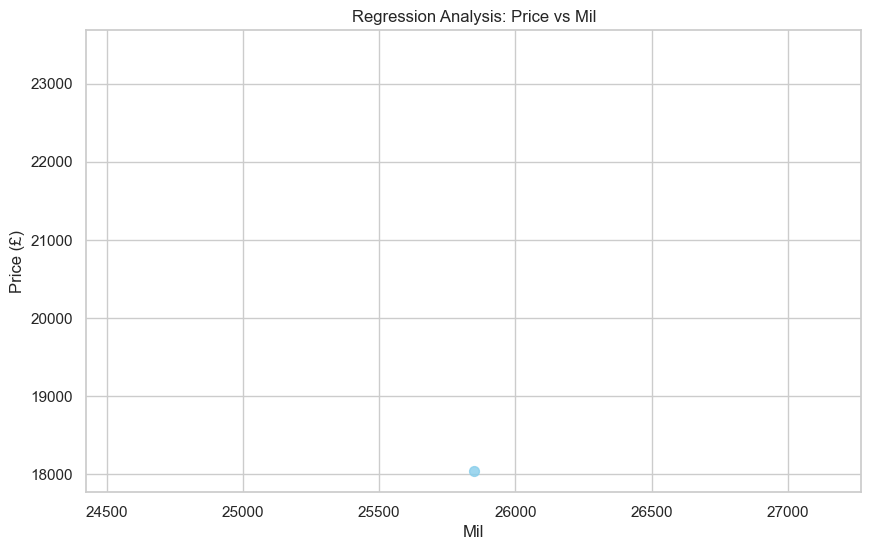

In [116]:
# Assuming your DataFrame is named 'df'
# If your DataFrame is not already loaded, you can load it using pd.read_csv('your_file.csv')
from sklearn import metrics
# Check and convert 'Price' and 'Mileage' columns to numeric if needed
if pd.api.types.is_string_dtype(df['Price']):
    df['Price'] = pd.to_numeric(df['Price'].str.replace('£', '').replace(',', ''), errors='coerce')

if pd.api.types.is_string_dtype(df['Mil']):
    df['Mil'] = pd.to_numeric(df['Mil'].str.replace(',', ''), errors='coerce')

# Split the data into training and testing sets
X = df[['Mil']]  # Independent variable(s)
y = df['Price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['Mil'], y=y_test, scatter_kws={'s': 50}, color='skyblue', ci=None)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Analysis: Price vs Mil')
plt.xlabel('Mil')
plt.ylabel('Price (£)')
plt.show()